<a href="https://colab.research.google.com/github/pabloudea/Metodos_Computacionales_taller/blob/main/Students/Restrepo_385/Lab03_Algoritmia_y_graficacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab03_Algoritmia_y_graficacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/hernansalinas/autogrades.git

fatal: destination path 'autogrades' already exists and is not an empty directory.


In [2]:
# Ejecutar esta celda antes de cada laboratorio
path="autogrades/Laboratorios_Taller/libs"
pathL="autogrades/Laboratorios_Taller/libs/Lab_03"
%run -i {path}/libUnitTest.py

In [3]:
import numpy as np
import matplotlib.pyplot as plt

1.0 Caos numérico en un mapa logístico y errores de punto flotante (Errores de redondeo)

> Un ejemplo clásico de caos,  es el comportamiento no lineal en las interaciones de un mapa logístico 

\begin{equation}
x_{n+1}=f(x_n)=rx_n(1-x_n)
\end{equation}

> con $x\in (0,1)$ y $r\in(0,4)$ se pueden producir varios comportamientos sorprendentes.

Para este problema, será extremadamente útil  ver sus resultados gráficamente; construya listas de números y llame la libreria matplotlib. 

> ### Problema: 
1. Programar la ecuación para el mapa logístico, y  realizar una grafica del valor de xn como funcion de n.

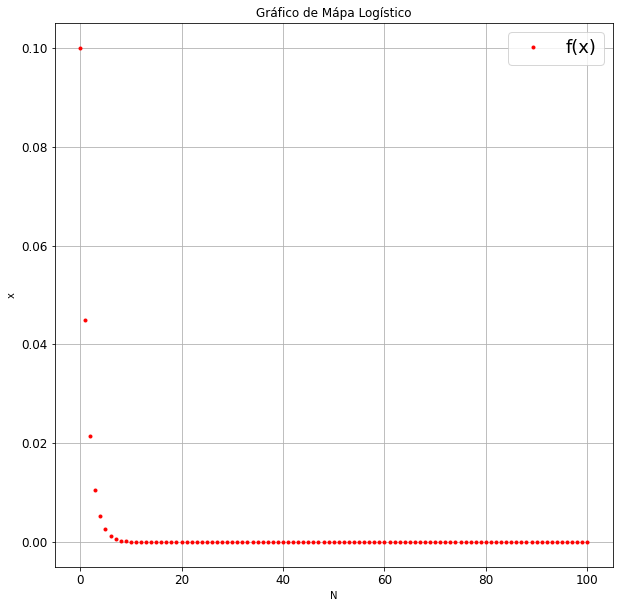

In [4]:
def f(x,r):
  return r*x*(1-x)

def mapa_logistico(x0, r, n):
    x = np.zeros(n+1)
    x[0] = x0
    for i in range(n):
        x[i+1] = r * x[i] * (1 - x[i])
    return x

p= mapa_logistico(0.1,0.5,100)
plt.figure(figsize=(10,10), facecolor="w")
plt.plot(p,'.r', label='f(x)')
plt.xlabel('N')
plt.ylabel("x")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.legend(loc='best', fontsize=18)
plt.title('Gráfico de Mápa Logístico')
plt.show()

2. Realizar pruebas para un $x_0=0.5$, con valores de r

```
  r = np.array([1.9, 2.9, 3.1, 3.5, 3.9,4.0])
  numpoints = 100, # Numero sugerido de iteraciones
  x0 = 0.5
```

Organizar las gráficas [multiples plot](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html)

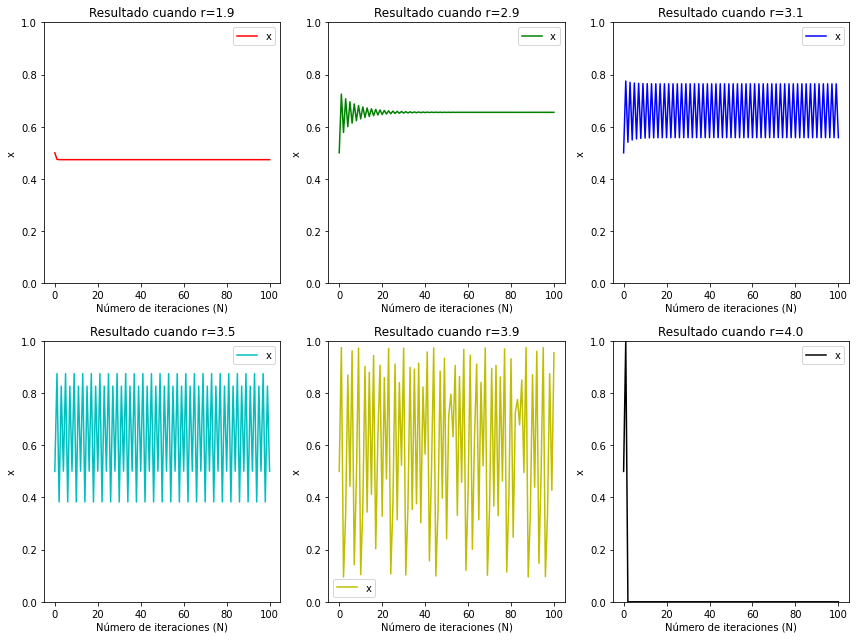

In [5]:
x0 = 0.5
r = np.array([1.9, 2.9, 3.1, 3.5, 3.9,4.0])
n = 100 # Numero sugerido de iteraciones

fig, axs = plt.subplots(2, 3, figsize=(12, 9))
axs = axs.ravel()
colores=['r','g','b','c','y','k']

for i, r_i in enumerate(r):
  x = mapa_logistico(x0, r_i, n)
  axs[i].plot(np.arange(n+1), x, '-', label=f'x',color=colores[i])
  axs[i].set_xlabel('Número de iteraciones (N)')
  axs[i].set_ylabel('x')
  axs[i].set_title('Resultado cuando r={}'.format(r_i))
  axs[i].legend()
  axs[i].set_ylim(0.,1.) 
plt.tight_layout()
plt.show()

3. Construye una rutina llamada logist_map en que entrada el valor de r, la condiciones inicial xi y el número de puntos determine la evolución en el punto N.  Prueba implementado las siguientes lineas.

```
Np = 1000
xf = np.zeros(Np)
r  = np.linspace(2.5, 4, Np)
 
for i in range(0, Np): 
  xini = np.random.random()
  x_i = logist_map(r = r[i], xi = xini, N = 1000) 
  xf[i] = x_i
```

In [6]:
#se redefine la función logist map para que sea funcional con el código a probar entregado en el enunciado:
def logist_map(r, xi, N):
  x = np.zeros(N)
  x[0] = xi
  for i in range(1, N):
    x[i] = r*x[i-1]*(1-x[i-1])
  return x

Np = 1000
#xfA = np.zeros(Np)
xf = np.zeros(Np)
r = np.linspace(2.5, 4, Np)
xiniA = np.random.random(Np)
for i in range(0, Np):
  xini = np.random.random(Np)
  x_i = logist_map(r=r[i], xi=xini[i], N=1000)
  xf[i] = x_i[-1]
  #x_iA = logist_map(r=r[i], xi=xiniA[i], N=10000)
  #xfA[i] = x_iA[-1]

4. Realiza un gráfico de:
```
  plt.plot((r-1/r), xf,  ".", markersize = 0.5)
```

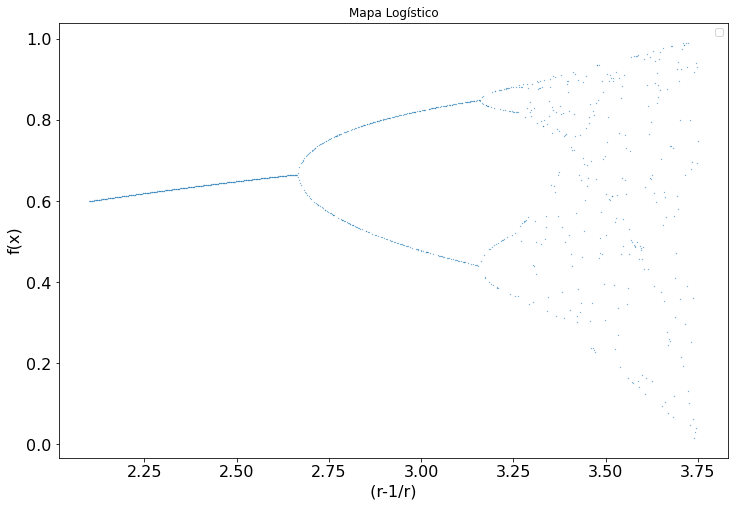

In [7]:
plt.figure(figsize = (12, 8))
plt.plot((r-1/r), xf, ".", markersize = .5)
plt.ylabel("f(x)", fontsize=16)
plt.xlabel(" (r-1/r) ", fontsize=16)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.title("Mapa Logístico")
plt.legend()
plt.show()

5. Encontrar dos formas adicionales de expresar $f(x)$, para estos valores funcionales determinar las mismas gráficas del numeral 3 para cada uno de las formas de escribir la expresión. En este caso se espera que los resultados varien. ¿A que se debe esto?. La respuesta no es inmediata, constulta algunas fuentes para sacar tu propia conclusión.

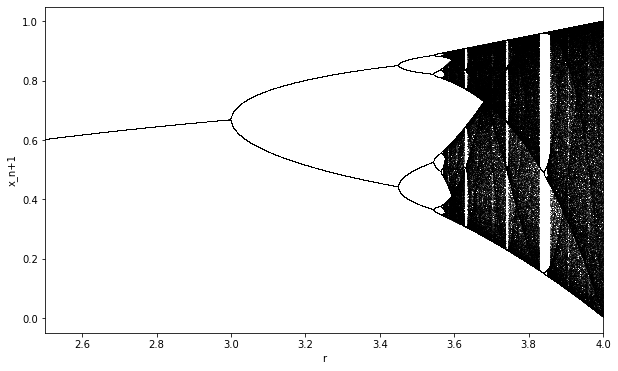

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función del mapa logístico
def logistic_map(x, r):
    return r * x * (1 - x)

# Configurar los parámetros del gráfico
r_min = 2.5
r_max = 4.0
r_steps = 10000
x_steps = 100
x_init = 0.5
num_iters = 1000

# Crear un arreglo de valores de r para evaluar el mapa logístico
r_vals = np.linspace(r_min, r_max, r_steps)

# Crear un arreglo para almacenar los valores de x_n+1 para cada valor de r
x_vals = np.zeros((r_steps, x_steps))

# Calcular los valores de x_n+1 para cada valor de r
for i in range(r_steps):
    r = r_vals[i]
    x = x_init
    for j in range(num_iters):
        x = logistic_map(x, r)
    for j in range(x_steps):
        x = logistic_map(x, r)
        x_vals[i,j] = x

# Graficar los valores de x_n+1 en función de r
fig, ax = plt.subplots(figsize=(10,6))
for i in range(x_steps):
    ax.plot(r_vals, x_vals[:,i], ',', color='black', alpha=0.5)
ax.set_xlim([r_min, r_max])
ax.set_xlabel('r')
ax.set_ylabel('x_n+1')
plt.show()


# 2
El algoritmo de gradiente descendente permite encontrar el minimo de funciones en espacios multidimensionales proponiendo puntos en la direccion en la que el gradiente desciende. Para el caso de una dimensión, podemos encontrar el mínimo realizando iteraciones y multiplicando su derivada en cada nuevo punto por una constante $\alpha$

\begin{equation}
x_{i+1}=x_i - \alpha \frac{\mathrm{d}f}{\mathrm{d}x}(x_i)
\end{equation}




Ejemplo:

Sea $f(\omega) = (\omega-1)^2$ , con $\omega \in \mathbb{R} $. El minimo de esta función esta determinado por
\begin{equation}
\frac{\mathrm{d}f}{\mathrm{d}\omega} = 0
\end{equation}

\begin{equation}
\omega = 1
\end{equation}


Para determinar el minimo,  a través del gradiente descendente puede ser aplicada el siguiente algoritmo:
1. Proponer un número aleatorios inicial $\omega_i$
2. Para descender al mínimo de la función, encontremos un  valor para el cual 
la derivada de la función descenciende, asi:
\begin{equation}
\omega_{i+1} = \omega_{i} - \alpha \frac{\mathrm{d}f(\omega_i)}{\mathrm{d}\omega}
\end{equation}

donde, $\alpha$ es conocido como la tasa de aprendizaje del algoritmo. 

3. Evaluar $f(\omega_{i+1})$

4. Iterar hasta encontrar el minimo de la función 


En el caso de la funcion propuesta, asumiendo un valor de $\alpha=1$, tenemos que:

1. Supongamos que $\omega_{0} = 2$, luego :
2. $\omega_{0+1} = 2 - 1 f'(\omega_{0}) =  = 0$
3. $f(0) = 1$
4. $\omega_{1+1} = 0 - 1 f'(\omega_{1}) = 0-1(2(0-1)) =  2$

El valor del $\omega$  despues de un par de iteraciones, no es el esperado, por que no minimiza la función, se debe proponer un tasa de aprendizaje  **$\alpha$** de tal forma que permita descender suavemente para encontrar el minimo. 



**Su tarea será**:

1. Disenar un programa, en el que entrada la función y su derivada, definidas como funciones lambda de python, se determine el valor mínimo de esa función. 
Prueba tu algoritmo para  la función $f(x) = x^2$

In [9]:
def gradesc(f,df,alpha=0.5):
    X=[]
    Fx=[]
    DF=[]
    x0=np.random.randint(1,10)
    while abs(df(x0))> 0.001:
       xn=x0-alpha*df(x0)
       X.append(xn)
       fn=f(xn)
       Fx.append(fn)
       df1=df(xn)
       DF.append(df1)
       x0=xn
    return [round(x0,5),X,Fx,DF]

In [10]:
f = lambda x: x**2
df = lambda x: 2*x

x_min = gradesc(f, df)
print("Valor mínimo de f(x)=x^2 es",f(x_min[0]),"en", x_min)


Valor mínimo de f(x)=x^2 es 0.0 en [0.0, [0.0], [0.0], [0.0]]


2. Realiza el grafico de la funcion y la derivada, especifica la leyenda de cada curva empleando el metodo legend() de matplotlib.

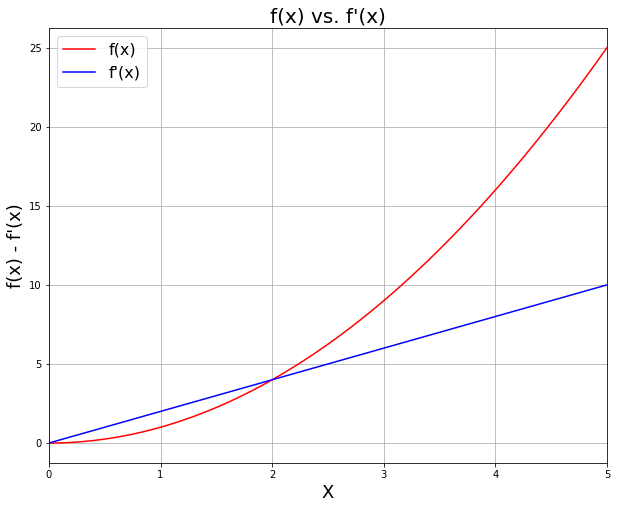

In [11]:
x=np.linspace(0,5,100)
plt.figure(figsize=(10, 8))
plt.plot(x,f(x), color="red",  label="f(x)")
plt.plot(x,df(x), color="blue", label="f'(x)")
plt.legend(fontsize=16)
plt.xlim(0,5)
#plt.ylim(0,100)
plt.ylabel("f(x) - f'(x)", fontsize=18)
plt.xlabel("X", fontsize=18)
plt.title("f(x) vs. f'(x)", fontsize=20)
plt.grid()
plt.show()

3. Analiza como se minimiza la función, gráficando de la funcion en cada punto a iterar,  como funcion del numero de iteraciones. Para dos valores diferentes de la constante alpha (prueba con $\alpha=0.1$, $\alpha=0.01$)

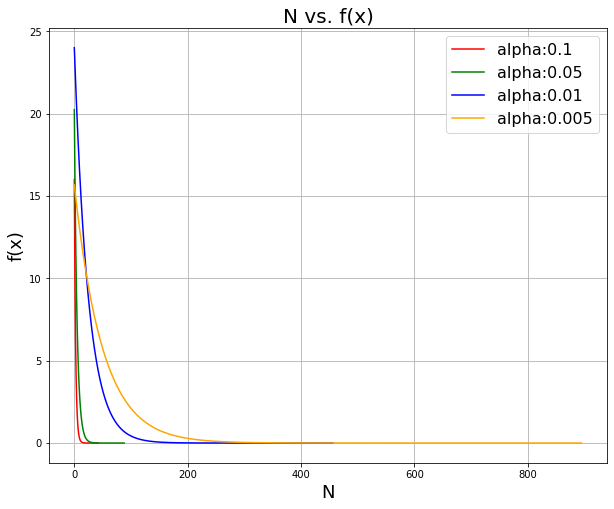

In [12]:
alpha = [0.1,0.05,0.01,0.005]
col = ['r','g','b','orange']
plt.figure(figsize=(10, 8))

for (a,c) in zip(alpha,col):
  x_min = gradesc(f, df,alpha=a)[2]
  N=len(x_min)
  x=np.linspace(0,N,N)
  plt.plot(x,x_min, color=c,  label="alpha:{}".format(a))
  plt.legend(fontsize=16)
plt.ylabel("f(x)", fontsize=18)
plt.xlabel("N", fontsize=18)
plt.title("N vs. f(x)", fontsize=20)
plt.grid()
plt.show()
